In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5ff17c6f54fd23191499c7017d6366538fcc35b61d0225390f78827c662577ddcc8d5d64ddf58c68c56d6ad68e5721930a5b7a5803b0bee173'

In [2]:
import aocd
from aocd.models import Puzzle
day = 20
year = 2023
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [6]:
from collections import deque

In [5]:
test_data = """broadcaster -> a, b, c
%a -> b
%b -> c
%c -> inv
&inv -> a
"""
data_test = test_data.splitlines()

In [144]:
test_data2 = """broadcaster -> a
%a -> inv, con
&inv -> b
%b -> con
&con -> output
output -> output"""
data_test2 = test_data2.splitlines()


In [4]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(58,
 ['%xf -> qr',
  '%qr -> bt, zt',
  '%xm -> gp, cq',
  '%zs -> ct',
  '&vg -> lg',
  '%dx -> bt, tz',
  '%tq -> jm',
  '%pr -> gp, pf',
  '&nb -> lg',
  '%tz -> bt'])

In [562]:
HIGH = 1
LOW = 0

class component():    
    def __init__(self):
        self.id = ""
        self.inp = []
        self.out = []
        self.q = None
        self.type = 'ukn'
        self.period = None
    
    def rec(self, pulse, origin):
        pass
    
    def send(self, pulse):
        if self.q is None:
            return
        for comp in self.out:
            # print('sending: ', comp, pulse, self.id)
            self.q.append((comp, pulse, self.id))
    
class ff(component):
    def __init__(self):
        super().__init__()
        self.state = False
    
    def rec(self, pulse, origin):
        if pulse == HIGH:
            return
        self.state = not self.state
        if self.state:
            self.send(HIGH)
        else:
            self.send(LOW)
            
class conj(component):
    def __init__(self):
        super().__init__()
        self.memory = {}
    
    def initialise(self):
        for key in self.inp:
            self.memory[key] = LOW
    
    def rec(self, pulse, origin):
        self.memory[origin] = pulse
        if all([val == HIGH for val in self.memory.values()]):
            self.send(LOW)
        else:
            self.send(HIGH)
            
class bc(component):
    
    def rec(self, pulse, origin):
        self.send(pulse)
    

class CPU():
    def __init__(self):
        self.q = deque()
        self.components = {}
        self.low_counter = 0
        self.high_counter = 0
        self.button_counter = 0
        
    def __getitem__(self, idx):
        return self.components[idx]
    
    def parse(self, data):
        for line in data:
            key, outs = line.split(' -> ')
            match key[0]:
                case "%": 
                    key = key[1:]
                    self.components[key] = ff()
                    self.components[key].type = 'ff'
                    
                case "&":
                    key = key[1:]
                    self.components[key] = conj()
                    self.components[key].type = 'conj'
                case _:
                    if key == 'broadcaster':
                        self.components[key] = bc()
                    else:
                        self.components[key] = component()
            self.components[key].out = outs.split(', ')
            self.components[key].q = self.q
            self.components[key].id = key
            
        # connect inputs
        missing = []
        for comp in self.components:
            for c in self.components[comp].out:
                if c not in self.components:
                    missing.append(c)
                else:
                    self.components[c].inp.append(comp)
        for m in missing:
            self.components[m] = component()
        for comp in self.components:
            if isinstance(self.components[comp], conj):
                self.components[comp].initialise()
                                
    
    def button(self):
        self.q.append(('broadcaster', LOW, None))
        self.button_counter += 1
        
    def loop(self):
        self.button()
        ans = False
        while len(self.q):
            _to, pulse, _from = self.q.popleft()
            if _from in ['vg', 'nb', 'vc', 'ls'] and pulse == HIGH:
                if self.components[_from].period is None:
                    self.components[_from].period = self.button_counter
                print(self.button_counter, _to, pulse, _from, len(self.q))
                ans = False
            # print(_from, pulse, _to)
            if pulse == LOW:
                self.low_counter += 1
            else:
                self.high_counter += 1
            self.components[_to].rec(pulse, _from)
        return ans

In [563]:
cpu = CPU()
# cpu.parse(data_test)
# cpu.parse(data_test2)
cpu.parse(data)

In [545]:
cpu.components

{'xf': <__main__.ff at 0xfffc59590670>,
 'qr': <__main__.ff at 0xfffc595934f0>,
 'xm': <__main__.ff at 0xfffc59592950>,
 'zs': <__main__.ff at 0xfffc59593730>,
 'vg': <__main__.conj at 0xfffc59590ca0>,
 'dx': <__main__.ff at 0xfffc59590d00>,
 'tq': <__main__.ff at 0xfffc595928c0>,
 'pr': <__main__.ff at 0xfffc59593370>,
 'nb': <__main__.conj at 0xfffc59590a30>,
 'tz': <__main__.ff at 0xfffc595915d0>,
 'kj': <__main__.ff at 0xfffc59592bf0>,
 'hx': <__main__.ff at 0xfffc59590c70>,
 'xh': <__main__.ff at 0xfffc595909d0>,
 'vc': <__main__.conj at 0xfffc59591a80>,
 'tl': <__main__.ff at 0xfffc595914e0>,
 'bb': <__main__.ff at 0xfffc595915a0>,
 'nn': <__main__.ff at 0xfffc59593070>,
 'nk': <__main__.ff at 0xfffc59593eb0>,
 'kp': <__main__.ff at 0xfffc59591b10>,
 'bt': <__main__.conj at 0xfffc595935e0>,
 'sr': <__main__.ff at 0xfffc595923e0>,
 'sh': <__main__.ff at 0xfffc59590b20>,
 'jm': <__main__.ff at 0xfffc59590580>,
 'kq': <__main__.ff at 0xfffc59590d90>,
 'vs': <__main__.ff at 0xfffc595

In [163]:
for i in range(1000):
    cpu.loop()

In [164]:
cpu.low_counter, cpu.high_counter

(18411, 50503)

In [165]:
puzzle.answer_a = int(cpu.low_counter * cpu.high_counter)

That's the right answer!  You are one gold star closer to restoring snow operations. [Continue to Part Two]


In [166]:
# Part 2

In [321]:
cpu = CPU()
# cpu.parse(data_test)
# cpu.parse(data_test2)
cpu.parse(data)

In [568]:
# &lg -> rx
collectors = cpu.components['lg'].inp
collectors

['vg', 'nb', 'vc', 'ls']

In [569]:
cpu = CPU()
cpu.parse(data)
i = 0
    
finished = 0
cnt = 0
while not cpu.loop():
    i += 1
    
    if sum([cpu[c].period is not None for c in collectors]) == len(collectors):
        break
    # if finished >= len(collectors):
    #     break
        

3851 lg 1 nb 15
3881 lg 1 vc 17
3931 lg 1 vg 13
3943 lg 1 ls 14


In [570]:
res = 1
for c in cpu.components['lg'].inp:
    print(c)
    res *= cpu[c].period
res

vg
nb
vc
ls


231657829136023

In [566]:
puzzle.answer_b = res

In [500]:
res = 1
for col in collectors:
    print(col, len(cpu[col].inp))
    print(cpu[col].min)
    print(cpu[col].onrange)
    bitsum = sum(cpu[col].min.values())
    print(bitsum - 2048, bitsum)
    res *= bitsum

bt 9
{4: 1, 3: 2, 0: 8, 8: 16, 5: 64, 7: 256, 6: 512, 1: 1024, 2: 2048}
{4: 1, 3: 2, 0: 8, 8: 16, 5: 64, 7: 256, 6: 512, 1: 1024, 2: 1883}
1883 3931
ml 7
{0: 1, 2: 2, 1: 8, 4: 256, 6: 512, 5: 1024, 3: 2048}
{0: 1, 2: 2, 1: 8, 4: 256, 6: 512, 5: 1024, 3: 1803}
1803 3851
rb 7
{5: 1, 1: 8, 4: 32, 2: 256, 3: 512, 6: 1024, 0: 2048}
{5: 1, 1: 8, 4: 32, 2: 256, 3: 512, 6: 1024, 0: 1833}
1833 3881
gp 9
{8: 1, 4: 2, 7: 4, 0: 32, 5: 64, 1: 256, 6: 512, 3: 1024, 2: 2048}
{8: 1, 4: 2, 7: 4, 0: 32, 5: 64, 1: 256, 6: 512, 3: 1024, 2: 1895}
1895 3943


In [496]:
[(c, cpu[c].type) for c in cpu['bt'].inp]

[('qr', 'ff'),
 ('dx', 'ff'),
 ('tz', 'ff'),
 ('nn', 'ff'),
 ('nk', 'ff'),
 ('kq', 'ff'),
 ('sv', 'ff'),
 ('bn', 'ff'),
 ('zt', 'ff')]

In [497]:
[(c, cpu[c].type) for c in cpu['ml'].inp]

[('sr', 'ff'),
 ('jm', 'ff'),
 ('vs', 'ff'),
 ('kh', 'ff'),
 ('zk', 'ff'),
 ('qz', 'ff'),
 ('ps', 'ff')]

In [493]:
res

231657829136023

In [ ]:
puzzle.answer_b = res

In [490]:
3931 * 3851 * 3881 * 3943

231657829136023

In [468]:
cpu = CPU()
# cpu.parse(data_test)
# cpu.parse(data_test2)
cpu.parse(data)

In [202]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 12

In [286]:
g = nx.DiGraph(directed=True)
for _id, comp in cpu.components.items():
    for out in comp.out:
        g.add_edge(_id, out, weight='1')
        
val_map = {'ff': 1,
           'conj': 0.5,
           'unk': 0.1
           }



values = [val_map.get(cpu.components[node].type, 0) for node in g.nodes()]

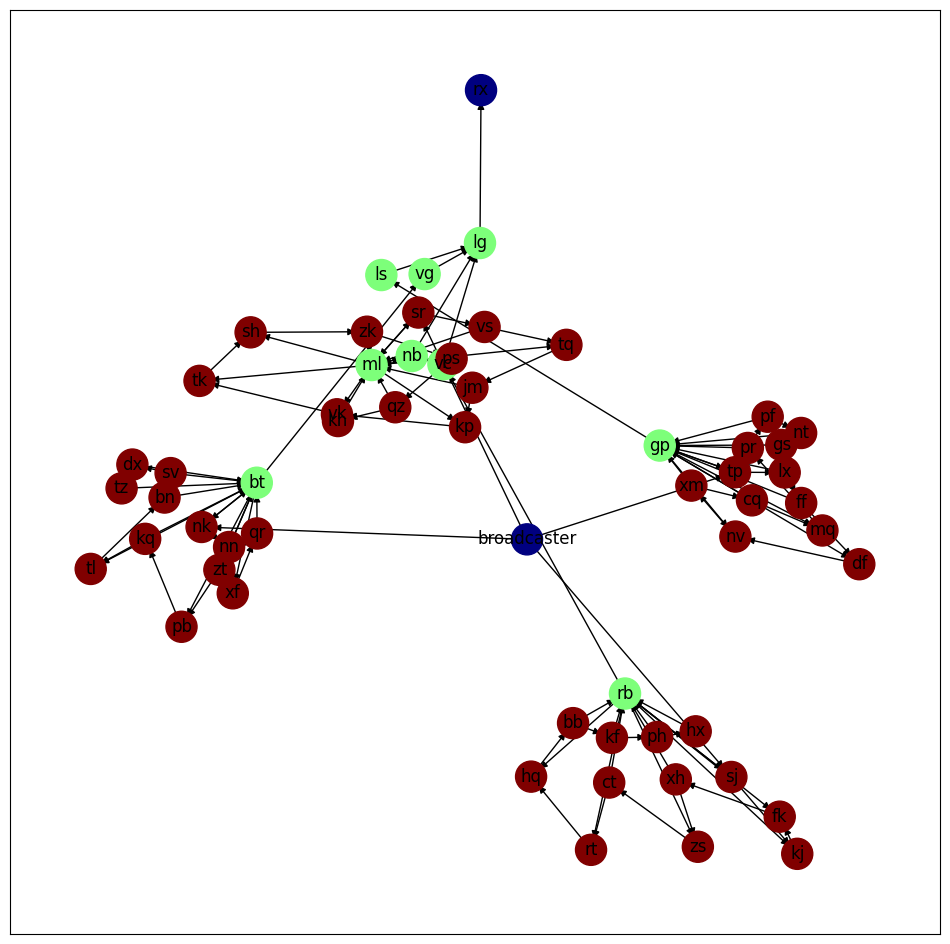

In [289]:
vis = nx.spring_layout(g)

nx.draw_networkx_nodes(g, vis, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(g, vis)
nx.draw_networkx_edges(g, vis, edge_color='k', arrows=True)
plt.show()

In [475]:
# too low
1883 * 1803 * 1833 * 1895

11792821528215